In [2]:
import pandas as pd
from sqlalchemy import create_engine
import warnings
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine2)
engine2.dispose()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

## Build model 
### features use humidity, windspeed, windbearing, and pressure 
### target variable temperature 

In [4]:
X = df[["humidity", "windspeed", "windbearing", "pressure"]]
Y = df [["temperature"]]

In [5]:
X.head()
Y.head()

,temperature
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556


In [6]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

lrm = sm.OLS(Y, X).fit()

lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:57:56   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.


### Assumption 1: Correct model specification
All of the factors that impact the response have been captured in the model; in other words, there are no omitted variables.
The functional form of the model is correct; in other words, the response is actually a linear combination of the estimated parameters.

In [7]:
predictions=lrm.predict(X)

In [10]:
errors = Y.temperature - predictions

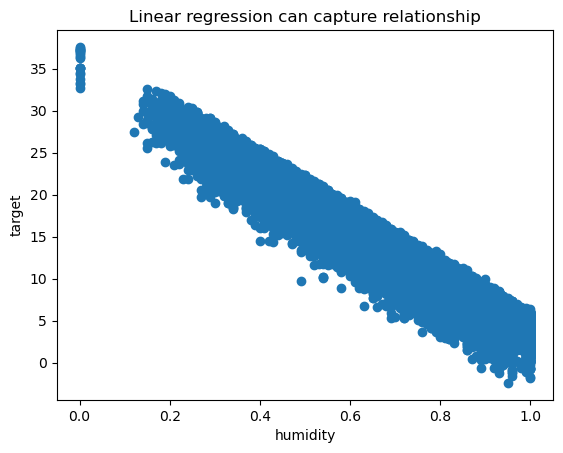

In [11]:
# Plot the estimated `Y` and `X`
# The relationship should be quadratic # , , humidity "windspeed", "windbearing", "pressure"

import matplotlib.pyplot as plt
plt.scatter(df[["humidity"]], predictions)
plt.xlabel("humidity")
plt.ylabel("target")
plt.title('Linear regression can capture relationship')
plt.show()

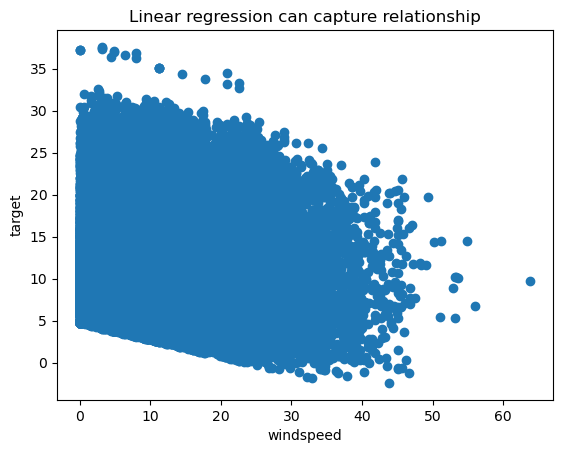

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df[["windspeed"]], predictions)
plt.xlabel("windspeed")
plt.ylabel("target")
plt.title('Linear regression can capture relationship')
plt.show()

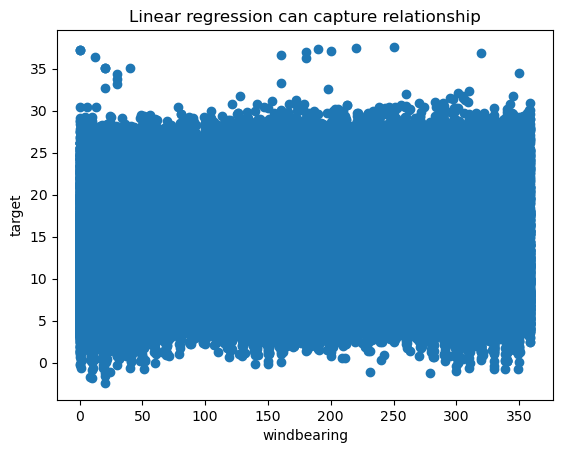

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df[["windbearing"]], predictions)
plt.xlabel("windbearing")
plt.ylabel("target")
plt.title('Linear regression can capture relationship')
plt.show()

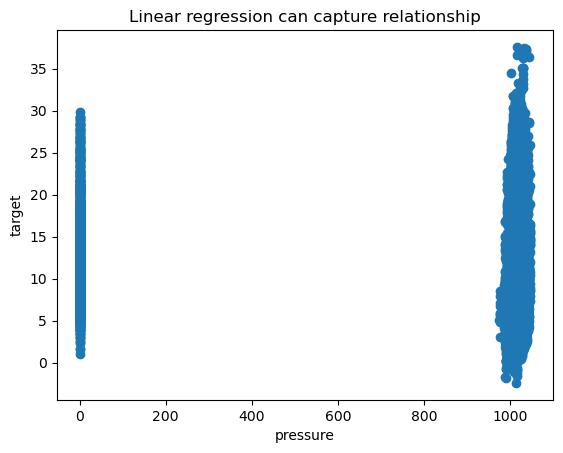

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df[["pressure"]], predictions)
plt.xlabel("pressure")
plt.ylabel("target")
plt.title('Linear regression can capture relationship')
plt.show()

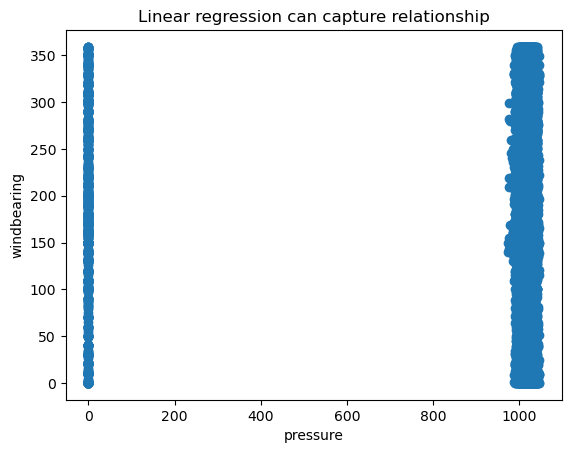

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df[["pressure"]], df[["windbearing"]])
plt.xlabel("pressure")
plt.ylabel("windbearing")
plt.title('Linear regression can capture relationship')
plt.show()

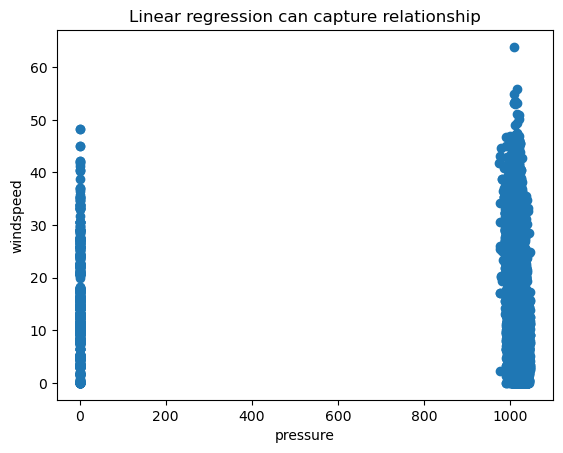

In [37]:
# The relationship should be quadratic # , , humidity "windspeed", "windbearing", "pressure"
import matplotlib.pyplot as plt
plt.scatter(df[["pressure"]], df[["windspeed"]])
plt.xlabel("pressure")
plt.ylabel("windspeed")
plt.title('Linear regression can capture relationship')
plt.show()

##### assumption 1 is valid for the features humidity "windspeed", "windbearing" as they are in liner relation
##### pressure is not in linear relation with target

## assumption 2 Exogeneity : this assumption implies that variation of the error term is not explained by the variation in the features.
## Assumption 2: The error term's expected value
## Assumption 3: Uncorrelated features and errors
   this implies that there is no degree of linear association between the error term and any of the features. This is sensible for the same reasons as assumption 2—if linear dependencies existed between the error term and the features, there would be no way to separate them when performing parameter estimation.

## Assumption 4: Homoscedasticity
A model is homoscedastic when the errors have constant variance across all observations—when the variability in the error doesn't depend on the feature values. 

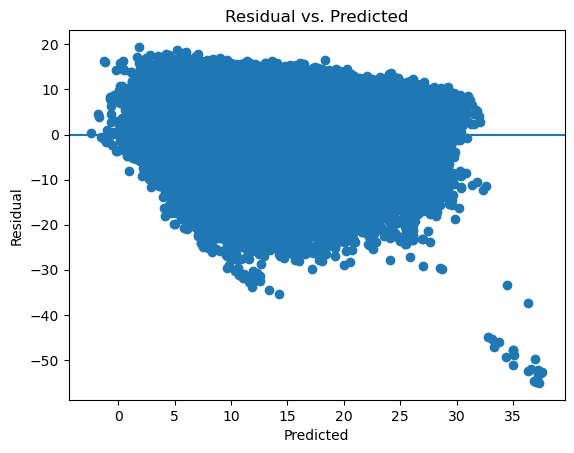

In [15]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [17]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


##### The p-values of both tests are lower than `0.05`. So, the test results reject the null hypothesis, which means that your errors are heteroscedastic.

## Assumption 5: (No perfect) multicollinearity
 If a feature is a linear combination of the rest, the resulting issue is known as perfect multicollinearity.

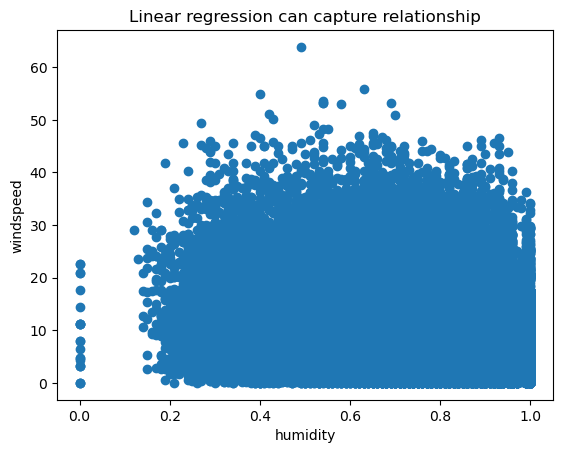

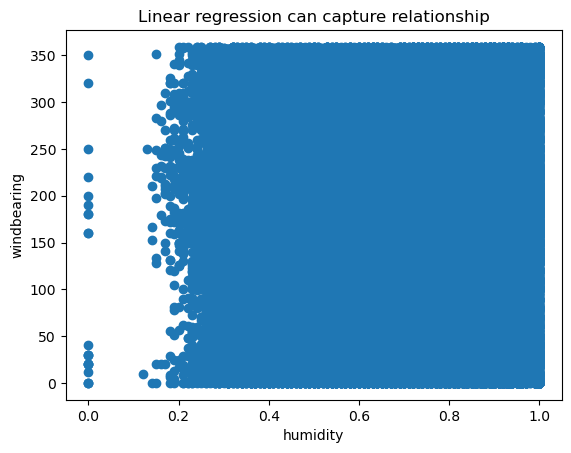

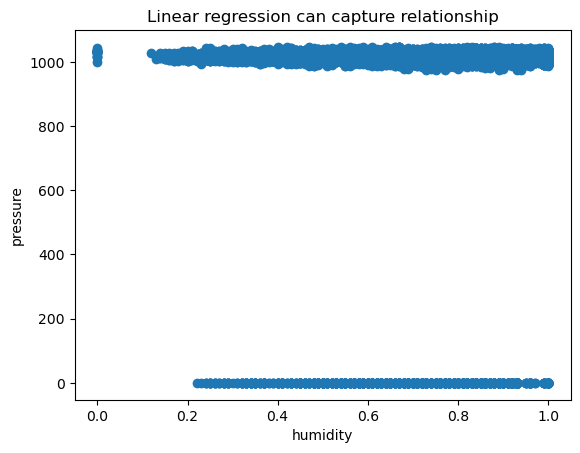

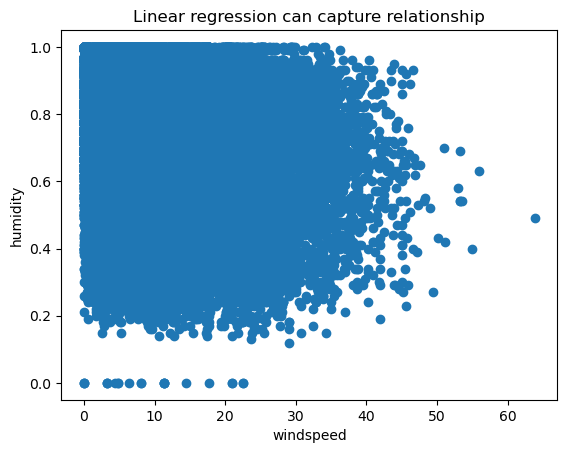

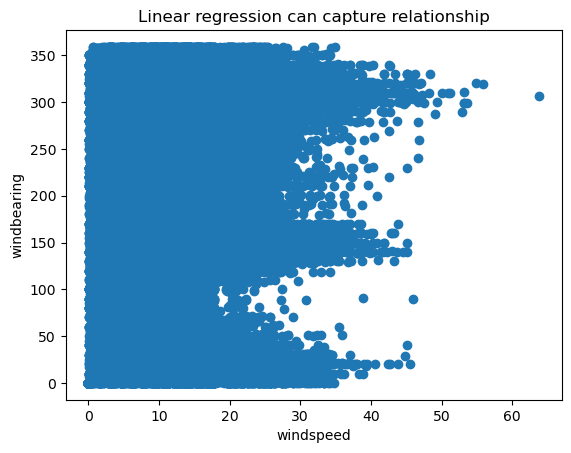

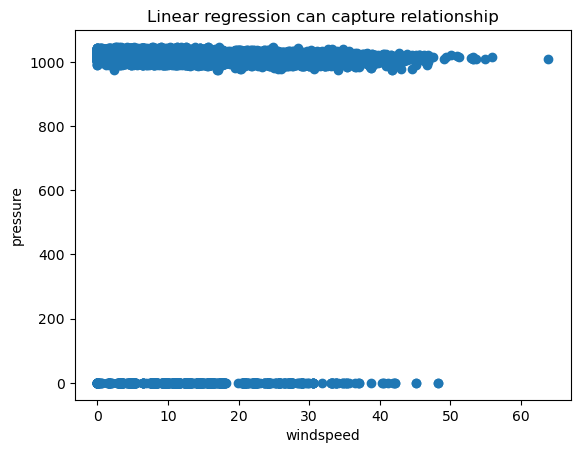

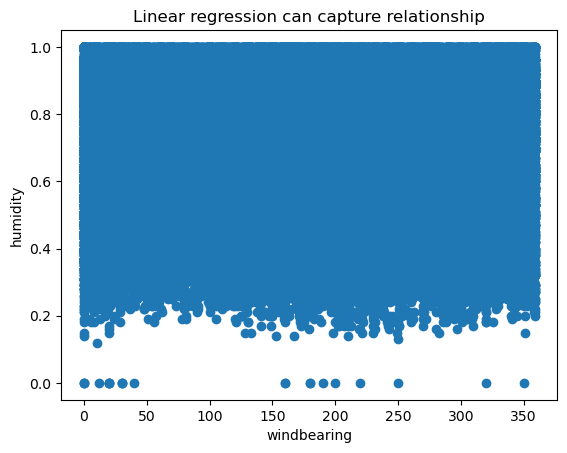

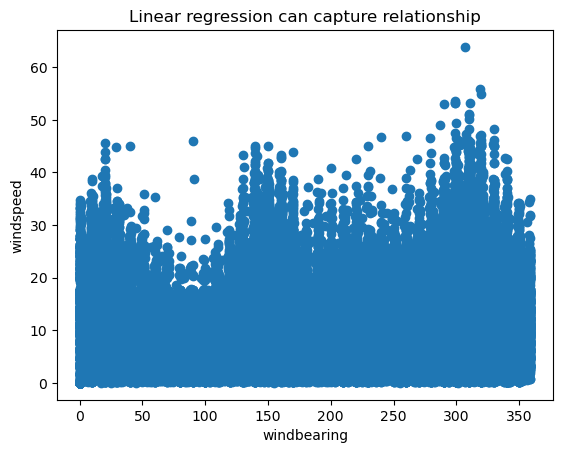

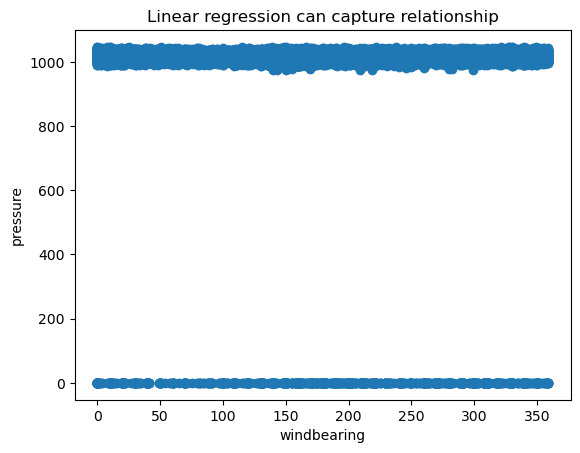

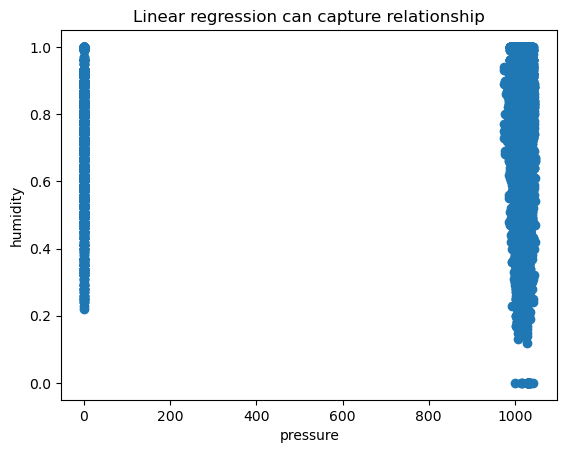

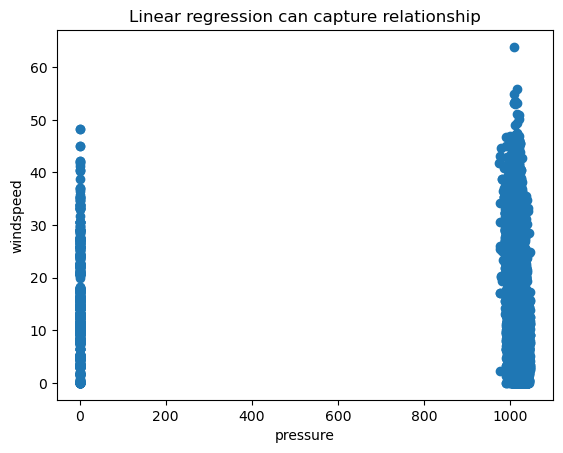

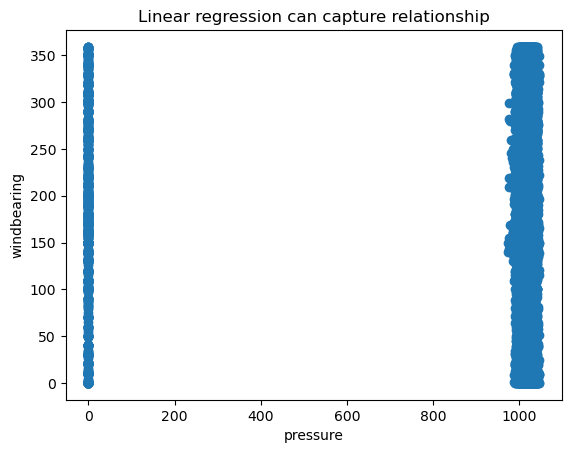

In [42]:
# try plot
# The relationship should be quadratic # , , humidity "windspeed", "windbearing", "pressure"
for feature in ("humidity", "windspeed", "windbearing", "pressure"):
  for feature2 in   ("humidity", "windspeed", "windbearing", "pressure"):
    if feature == feature2:
        continue
    plt.scatter(df[[feature]], df[[feature2]])
    plt.xlabel(feature)
    plt.ylabel(feature2)
    plt.title('Linear regression can capture relationship')
    plt.show()

## features looks not having any linear combination

## Assumption 6: Uncorrelated error terms

Error terms should be uncorrelated with one another. In other words, the error term for one observation shouldn't predict the error term for another. This type of serial correlation may happen if you omit a relevant variable from the model. So, including that variable into the model can solve this issue. 

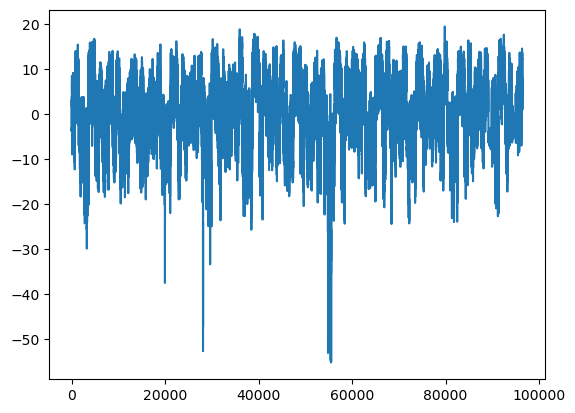

In [44]:
plt.plot(errors)
plt.show()

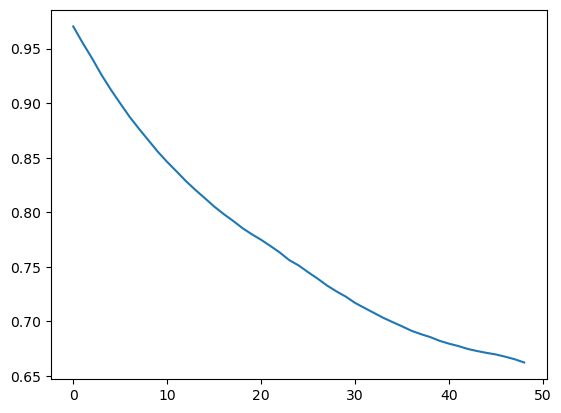

In [45]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()